#### Objective for IVSCC Manuscript Graphs

In [1]:
"""
Lockdown Date: 190830 for all graphs
nucleus_present vs nucleus_absent data:
-Restrict data collection range: anything with MET project code to 180620
-Because we only collect nucleus present after 180620
-MET data only

Nucleus_present analysis:
-present vs. absent

Comparion of present vs. absent with:
-cDNA quality (%>400 bp)
-Tree call(core, I1, I2, I3 and PoorQ)
-# of genes
-amplified content same as cDNA quantity (picogreen yield)
"""

'\nLockdown Date: 190830 for all graphs\nnucleus_present vs nucleus_absent data:\n-Restrict data collection range: anything with MET project code to 180620\n-Because we only collect nucleus present after 180620\n-MET data only\n\nNucleus_present analysis:\n-present vs. absent\n\nComparion of present vs. absent with:\n-cDNA quality (%>400 bp)\n-Tree call(core, I1, I2, I3 and PoorQ)\n-# of genes\n-amplified content same as cDNA quantity (picogreen yield)\n'

#### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

#### Path variables

In [4]:
csv_path = "C:/Users/kumar/Documents/GitHub/Personal-Projects/ivscc_paper/csvs/"
#"C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/csvs/"
graph_path = "C:/Users/kumar/Documents/GitHub/Personal-Projects/ivscc_paper/graphs/"
#"C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/graphs/"

#### Misc

In [5]:
colors = ["#74c476", "#fb6a4a"] #nucleus_present, nucleus_absent
patch_order = ["nucleus_present", "nucleus_absent"]

#### Read Shiny mouse

In [6]:
shinym_df = pd.read_csv(csv_path + "shiny_mouse.csv")
#shinym_df = pd.read_csv("//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv")
#shinym_df.to_csv(csv_path + "shiny_mouse.csv")

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (136) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Filter to desired columns in shinym_df

In [7]:
shinym_col_list = ["sample_id",
                   "Data",
                   "postPatch",
                   "percent_cdna_longer_than_400bp",
                   "amplified_quantity_ng",
                   "Genes.Detected.CPM", #Same one Kristen used
                   "Tree_call",
                   "marker_sum_norm_label",
                   "Total_time"]
##"Genes.With.CPM", "Genes.With.FPKM", "Genes.Detected", #Probably not the correct ones
shinym_df = shinym_df[shinym_col_list]
len(shinym_df)

9791

#### Filtering shinym_df based on conditions and creating/sorting by date column

In [8]:
shinym_df.dropna(subset=["postPatch"], inplace=True) # 7 NaN samples
shinym_df["date"] = shinym_df.sample_id.str[5:11]
shinym_df.sort_values("date", inplace=True)
shinym_df.set_index("date", inplace=True)
shinym_df = shinym_df.loc[:"180620"]

In [9]:
prod_df = shinym_df[shinym_df["Data"] == "Production"]
len(prod_df)

3162

#### met_df has only cells with project code mIVSCC-MET

In [10]:
met_df = prod_df[(prod_df.postPatch == "nucleus_present") | (prod_df.postPatch == "nucleus_absent")]
len(met_df)

2916

#### Replacing all terminology to nucleus_present and nulceus_absent for all production data

In [11]:
replacements = {"Nucleated" : "nucleus_present", 
                "Partial-Nucleus" : "nucleus_present",
                "No-Seal" : "nucleus_absent",
                "Entire-Cell" : "nucleus_absent",
                "entire_cell" : "nucleus_absent",
                "Outside-Out" : "nucleus_absent"}
prod_df["postPatch"] = prod_df["postPatch"].replace(replacements)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
prod_df.postPatch.value_counts()

nucleus_present    2072
nucleus_absent     1090
Name: postPatch, dtype: int64

In [13]:
met_df.postPatch.value_counts()

nucleus_present    1916
nucleus_absent     1000
Name: postPatch, dtype: int64

In [14]:
len(met_df)

2916

#### Patch Duration Integration

In [15]:
met_df.dropna(subset=["Total_time"], inplace=True)
len(met_df)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2896

In [16]:
met_df["Total_time_min"] = met_df["Total_time"] / 60

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"]
met_df = met_df[(met_df["Total_time_min"] > 0) & (met_df["Total_time_min"] <= 30)]
met_df["Total_time_bins"] = pd.cut(x=met_df["Total_time_min"], bins=bins, labels=labels)
len(met_df)

2884

#### Obtaining mean markers sums for line plots

In [18]:
met_amp = met_df.groupby(["Total_time_bins", "postPatch"])["amplified_quantity_ng"].agg(["mean", "size"])
met_dna = met_df.groupby(["Total_time_bins", "postPatch"])["percent_cdna_longer_than_400bp"].agg(["mean", "size"])
met_gen = met_df.groupby(["Total_time_bins", "postPatch"])["Genes.Detected.CPM"].agg(["mean", "std", "size"])
met_nms = met_df.groupby(["Total_time_bins", "postPatch"])["marker_sum_norm_label"].agg(["mean", "std", "size"])

met_amp.reset_index(inplace=True)
met_dna.reset_index(inplace=True)
met_gen.reset_index(inplace=True)
met_nms.reset_index(inplace=True)

In [19]:
met_amp

,Total_time_bins,postPatch,mean,size
0,0-5,nucleus_absent,7.476521,94
1,0-5,nucleus_present,10.560049,55
2,5-10,nucleus_absent,11.199139,347
3,5-10,nucleus_present,14.965869,832
4,10-15,nucleus_absent,10.795019,330
5,10-15,nucleus_present,16.359592,673
6,15-20,nucleus_absent,10.122738,171
7,15-20,nucleus_present,14.307483,288
8,20-25,nucleus_absent,8.282683,44
9,20-25,nucleus_present,13.195116,41


In [20]:
met_dna

,Total_time_bins,postPatch,mean,size
0,0-5,nucleus_absent,0.381372,94
1,0-5,nucleus_present,0.479236,55
2,5-10,nucleus_absent,0.451118,347
3,5-10,nucleus_present,0.559978,832
4,10-15,nucleus_absent,0.449809,330
5,10-15,nucleus_present,0.573646,673
6,15-20,nucleus_absent,0.466801,171
7,15-20,nucleus_present,0.580524,288
8,20-25,nucleus_absent,0.451386,44
9,20-25,nucleus_present,0.568634,41


In [21]:
met_gen

,Total_time_bins,postPatch,mean,std,size
0,0-5,nucleus_absent,3412.436170,1956.044239,94
1,0-5,nucleus_present,5540.236364,2922.835869,55
2,5-10,nucleus_absent,5048.466859,2424.280728,347
3,5-10,nucleus_present,7467.212740,2177.141428,832
4,10-15,nucleus_absent,4984.427273,2441.720378,330
5,10-15,nucleus_present,7884.433878,2112.494347,673
6,15-20,nucleus_absent,5592.725146,2858.376032,171
7,15-20,nucleus_present,7874.222222,2167.060439,288
8,20-25,nucleus_absent,4879.568182,2187.170726,44
9,20-25,nucleus_present,8029.756098,1985.780436,41


In [22]:
met_nms

,Total_time_bins,postPatch,mean,std,size
0,0-5,nucleus_absent,0.321673,0.220208,94
1,0-5,nucleus_present,0.598355,0.328154,55
2,5-10,nucleus_absent,0.464893,0.270356,347
3,5-10,nucleus_present,0.812111,0.230752,832
4,10-15,nucleus_absent,0.456848,0.274907,330
5,10-15,nucleus_present,0.827376,0.218393,673
6,15-20,nucleus_absent,0.486470,0.301569,171
7,15-20,nucleus_present,0.806215,0.236004,288
8,20-25,nucleus_absent,0.472411,0.255275,44
9,20-25,nucleus_present,0.811636,0.229539,41


#### Graph Function for Line Graph

In [23]:
def linplt(col_label, df):
    ax=sns.catplot(kind="point", x="Total_time_bins", y="mean", hue="postPatch", hue_order=patch_order, data=df,
                   palette=colors, saturation=1, width=0.6, aspect=1.3, legend=False)
    ax.set(xlabel="Patch Duration (min)", ylabel=col_label)

In [24]:
def poiplt(col, col_label, df):
    plt.figure(figsize=(8, 6))
    ax=sns.pointplot(x="Total_time_bins", y=col, hue="postPatch", hue_order=patch_order,
                     data=df, palette=colors, dodge=True,
                     markers=["o", "o"], linestyles=["-", "--"], capsize=0.2, errwidth=0.9, scale=1)
    ax.legend_.remove()
    ax.set(xlabel="Patch Duration (min)", ylabel=col_label)
    plt.savefig(graph_path + "met_poi" + col + ".jpeg", bbox_inches="tight")

#### Graph Function for Boxen Graph

In [25]:
def benplt(col, col_label, df):
    ax=sns.catplot(kind="boxen", x="Total_time_bins", y=col, hue="postPatch", 
                   hue_order=["nucleus_present", "nucleus_absent"], 
                   data=df, palette=colors, saturation=1, width=0.6, aspect=2, legend=False)
    ax.set(xlabel="Patch Duration (min)", ylabel=col_label)
    #plt.legend(frameon=True, fancybox=True, title="Post Patch Outcome",
    #           loc="center left", bbox_to_anchor=(1.0, 0.5), shadow=True)
    plt.savefig(graph_path + "met_ben" + col + ".jpeg", bbox_inches="tight")

#### Graph Function for Violin Graph

In [26]:
def vioplt(col, col_label, df):
    plt.figure(figsize=(5, 6))
    ax=sns.violinplot(x="postPatch", y=col, data=df, order=patch_order, 
                      scale="count", inner="quartile", 
                      linewidth=1, saturation=1, width=0.9, palette=colors)
    ax=sns.swarmplot(x="postPatch", y=col, data=df, order=patch_order,
                     linewidth=1, size=0.3, color="0.2")
    ax.set_xlabel("Post Patch Outcome")
    ax.set_ylabel(col_label, fontsize=16)
    plt.savefig(graph_path + "met_vio" + col + ".jpeg", bbox_inches="tight")

#### Graph Functions for Stacked Percentage Bar Graph

In [27]:
def piv_table(df):
    df1 = df.loc[:,["postPatch", "Tree_call", "Data"]]
    df1 = df.groupby(["postPatch", "Tree_call"]).count()
    df1 = df1.rename(columns = {"Data" : ""})
    df1.reset_index(inplace = True)
    df1 = df1.pivot_table(values=[''], index=["postPatch"], columns = ["Tree_call"], aggfunc="sum")
    return df1

def stacked_plot(df):
    nuc_order = ["nucleus_present", "nucleus_absent"]
    my_colors = ['#74c476', '#de2d26']
    bp = df.loc[nuc_order].plot(kind="bar", stacked = True, figsize= (8,6), rot = 0, 
                 colormap=ListedColormap(sns.color_palette("GnBu", 10)),width = 0.4)

    bp.legend(["Core", "I1", "I2", "I3", "PoorQ"], loc = 0, bbox_to_anchor = (1, 1.02), 
              frameon = True, shadow = True, fontsize = 13)

    plt.subplots_adjust(left = 0.1, right = 0.8, bottom = None, top = None, wspace=None, hspace=None)
    #This helps if axis labels are getting cutoff when saving final image

    #Rusty's Method figure it out later
    rects = bp.patches
    labels = post_patch_totals

    #Rusty's Method figure it out later
    for rect, label in zip (rects, labels):
        height = 100
        x_value = rect.get_x() + rect.get_width() / 2
        bp.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', size = 12)

    bp.set_title("Tree calls for Post Patch Outcomes")
    bp.set(xlabel = "Post Patch Outcome", ylabel = "Percentage")
    plt.savefig(graph_path + "met_stk.jpeg", bbox_inches="tight")

#### Line Graphs

In [28]:
met_df.postPatch.value_counts()

nucleus_present    1894
nucleus_absent      990
Name: postPatch, dtype: int64

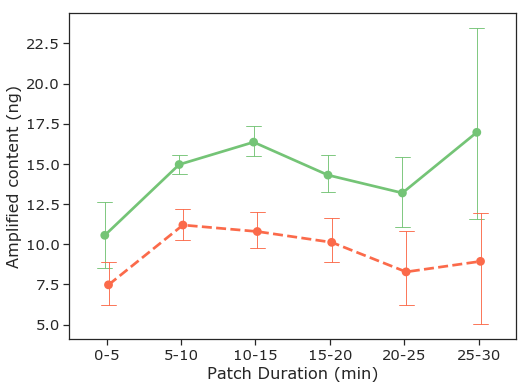

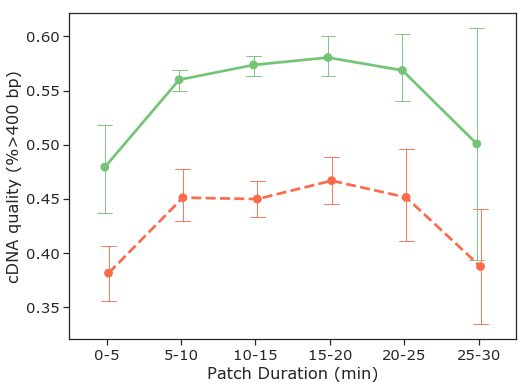

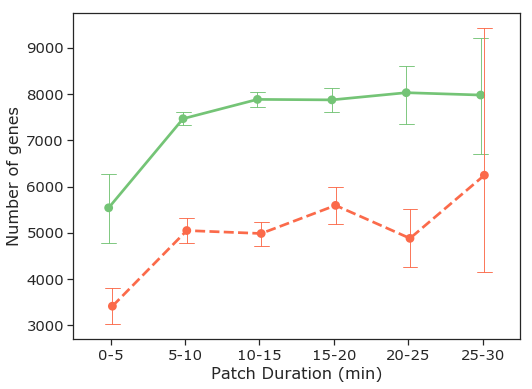

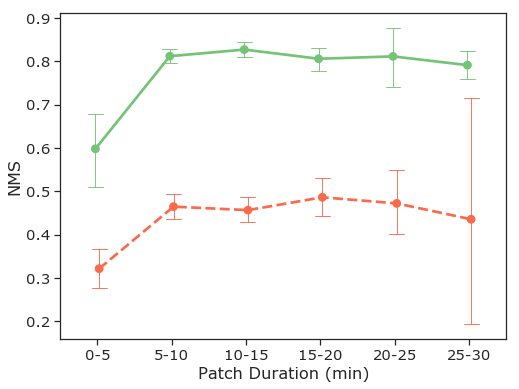

In [29]:
poiplt("amplified_quantity_ng", "Amplified content (ng)", met_df)
poiplt("percent_cdna_longer_than_400bp", "cDNA quality (%>400 bp)", met_df)
poiplt("Genes.Detected.CPM", "Number of genes", met_df)
poiplt("marker_sum_norm_label", "NMS", met_df)

#### Boxen Graphs

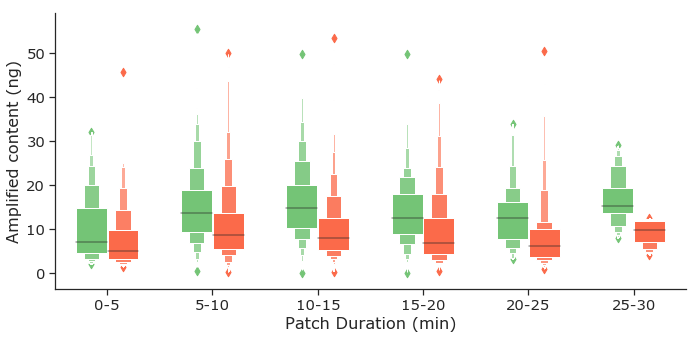

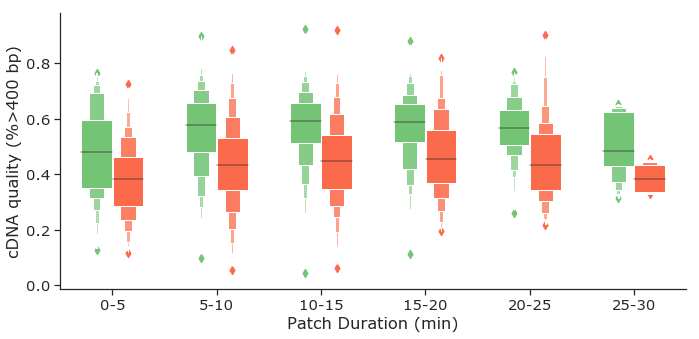

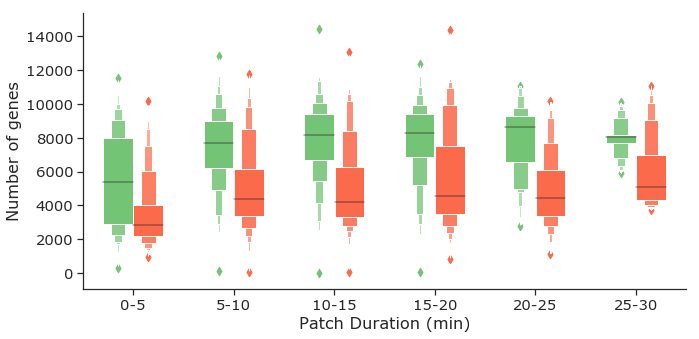

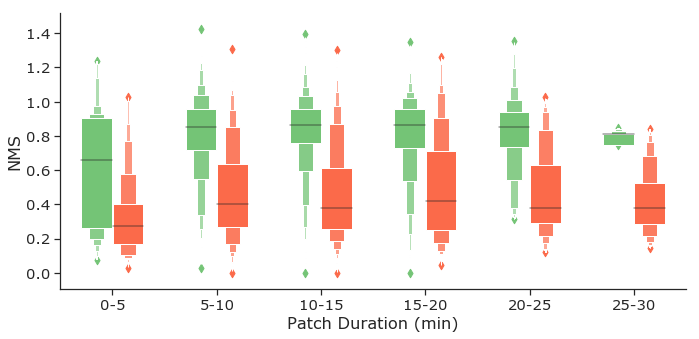

In [30]:
benplt("amplified_quantity_ng", "Amplified content (ng)", met_df[met_df.amplified_quantity_ng <= 60])
benplt("percent_cdna_longer_than_400bp", "cDNA quality (%>400 bp)", met_df[met_df.percent_cdna_longer_than_400bp <= 1])
benplt("Genes.Detected.CPM", "Number of genes", met_df[met_df["Genes.Detected.CPM"] <= 15000])
benplt("marker_sum_norm_label", "NMS", met_df[met_df.marker_sum_norm_label <= 1.5])

#### Violin Graphs

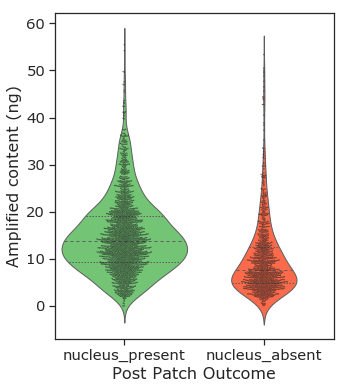

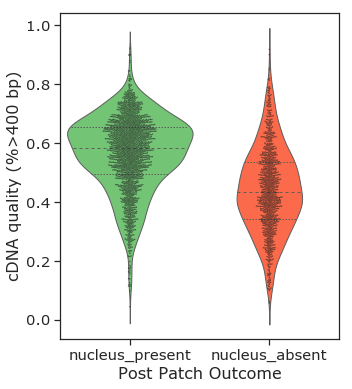

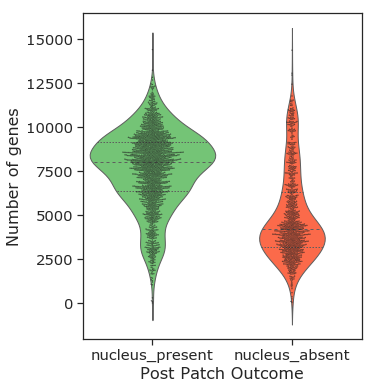

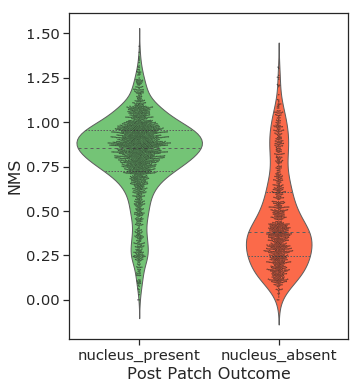

In [31]:
vioplt("amplified_quantity_ng", "Amplified content (ng)", met_df[met_df.amplified_quantity_ng <= 60])
vioplt("percent_cdna_longer_than_400bp", "cDNA quality (%>400 bp)", met_df[met_df.percent_cdna_longer_than_400bp <= 1])
vioplt("Genes.Detected.CPM", "Number of genes", met_df[met_df["Genes.Detected.CPM"] <= 15000])
vioplt("marker_sum_norm_label", "NMS", met_df[met_df.marker_sum_norm_label <= 1.5])

#### Stacked Percentage Bar Graph

In [32]:
met_df1 = piv_table(met_df)
post_patch_totals = list(met_df1.sum(1))
post_patch_totals = [int(x) for x in post_patch_totals]
met_df1 = met_df1.div(met_df1.sum(1), axis=0) * 100
met_df1

Tree_call             Core         I1         I2        I3      PoorQ
postPatch                                                            
nucleus_absent   11.919192   7.979798   4.848485  1.212121  74.040404
nucleus_present  47.360084  17.951426  16.050686  1.478353  17.159451

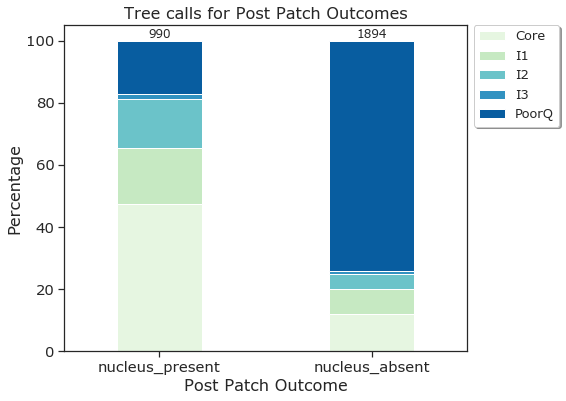

In [33]:
stacked_plot(met_df1)

#### Countplot for Tree_calls for nucelus_present vs nucleus_absent

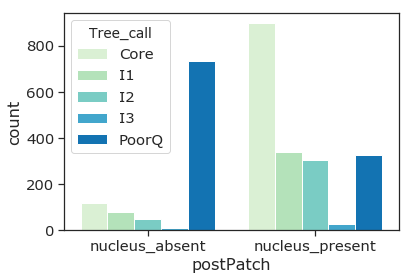

In [34]:
sns.countplot(x="postPatch", hue="Tree_call", hue_order = ["Core", "I1", "I2", "I3", "PoorQ"],
              data=met_df, palette="GnBu", saturation=1)

#### Writing dataframe into Excel Sheets

In [35]:
writer = pd.ExcelWriter(graph_path + "nucleus_present_absent_RR.xlsx")
met_df.to_excel(writer, "MET Data", freeze_panes=(1,0))
prod_df.to_excel(writer, "Production Data", freeze_panes=(1,0))
shinym_df.to_excel(writer, "Reference Shiny Mouse Data", freeze_panes=(1,0))
writer.save()